In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams["figure.figsize"] = (30, 12)
pylab.rcParams["font.size"] = 24
pylab.rcParams["font.family"] = "serif"

In [3]:
dT = 0.003
T = 0.01
Um = 4
w = 2*pi/T

def ff(t):
    result = None
    if 0 <= t and t <= 2*dT/3:
        result = 1000*t + 2
    elif 2*dT/3 < t and t <= dT:
        result = Um
    else:
        result = 0
    return result

def fff(t):
    return list(map(ff, t))

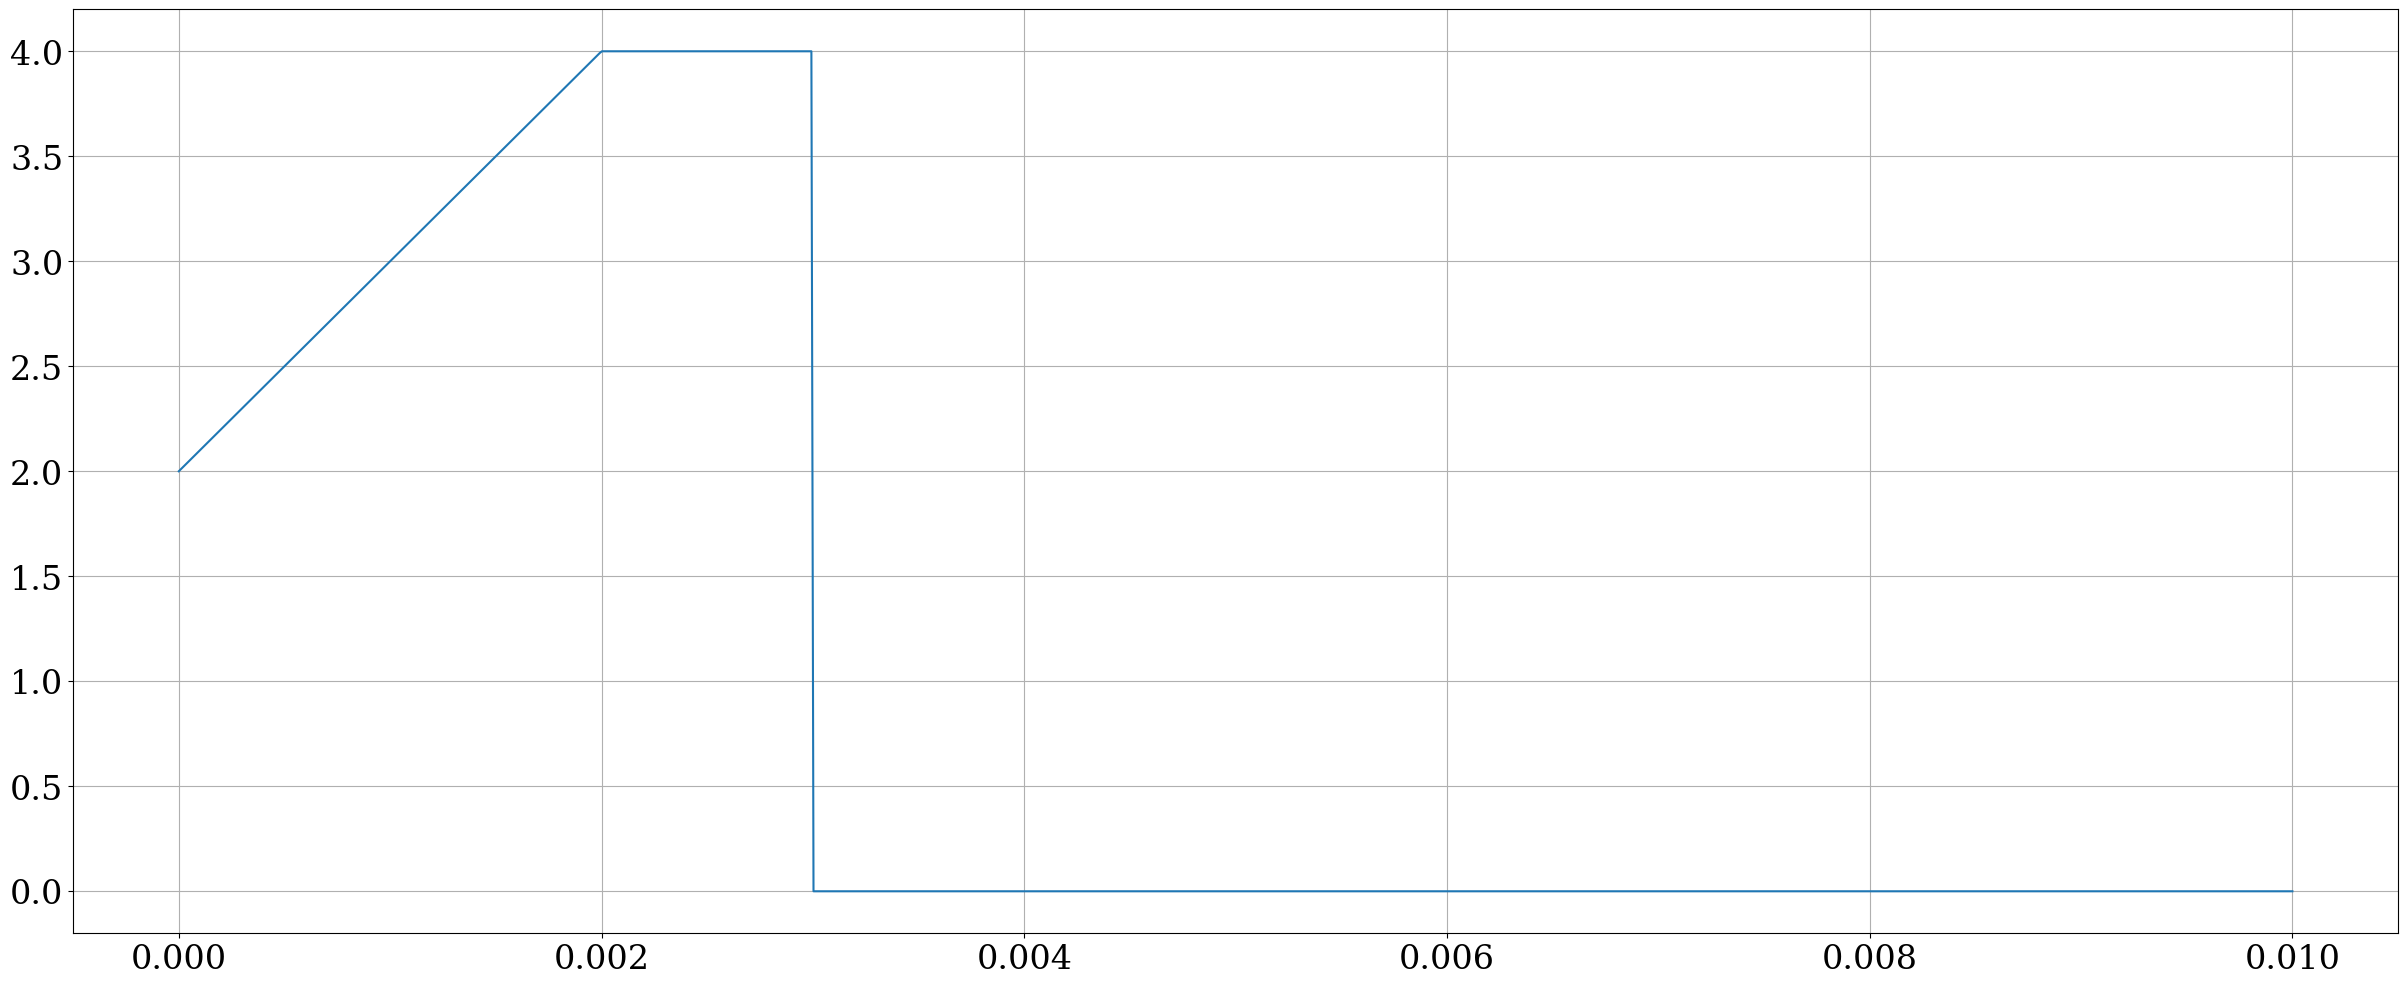

In [97]:
t = linspace(0, T, 1000)
plot(t, fff(t))
grid()

In [5]:
from scipy import integrate

In [6]:
a0 = (2/T) * integrate.quad(ff, 0, T)[0]

In [7]:
a0

2.0000000056334595

In [13]:
def fcos(t, n):
    return fff(t)*cos(n*w*t)

def fsin(t, n):
    return fff(t)*sin(n*w*t)

In [43]:
def a(n):
    return (2/T) * integrate.trapezoid(fcos(t, n), t)

def b(n):
    return (2/T) * integrate.trapezoid(fsin(t, n), t)

In [80]:
def an(n):
    return (4/(pi*n))*sin(0.4*pi*n)\
        + (5/((n**2) * (pi**2)))*(cos(0.4*pi*n)-1)\
        + (4/(pi*n))*(sin(0.6*pi*n) - sin(0.4*pi*n))

In [95]:
def f(t):
    s = 0
    for n in range(1, 300):
        s += a(n)*cos(n*w*t) + b(n)*sin(n*w*t)
    return s + a0*0.5

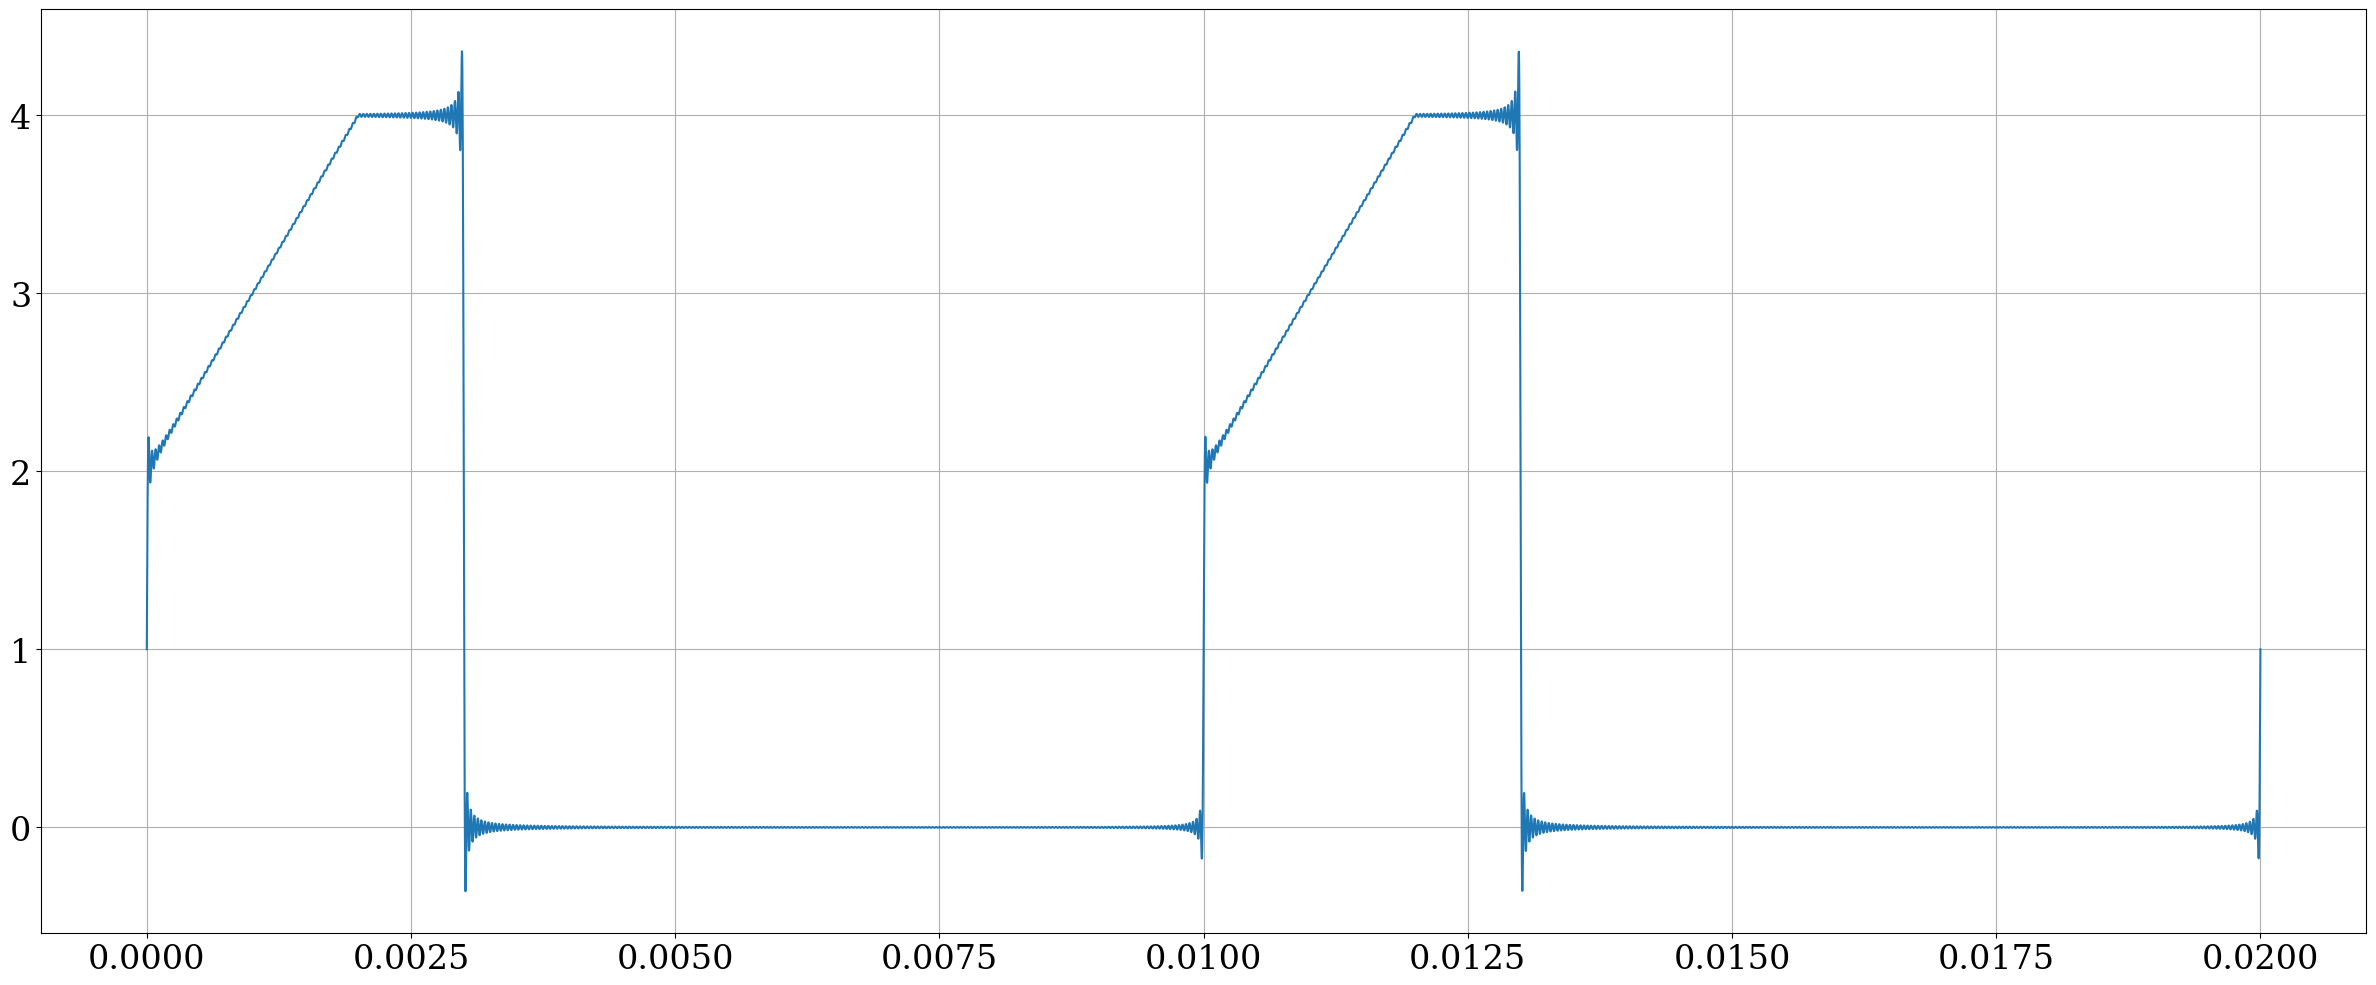

In [104]:
t = linspace(0, 2*T, 10000)
plot(t, f(t))
grid()
savefig('123-2.png')